# Lab session 1 : Signal representation using Octave

GNU-Octave is a free software dedicated to scientific computing. You will be able to use Octave as a super-calculator to solve numerical problems, visualize function or signal graphs, visualize the spectrum of a signal (via a discrete Fourier transform), visualize and process digital images,... It is also a programming language that will allow you to perform simple or elaborate tasks of analysis and processing of digital signals. In this signal processing course, you will use it in particular for your practical work and the terminal project. Note that GNU-Octave is largely compatible with the MatLab software (MATrix LABoratory), a standard in industrial and academic research, so that the skills you will acquire while learning GNU-Octave (often referred to as a MatLab clone) will be directly transferable to MatLab. 

Like MatLab, GNU-Octave is an interpreted language (no compilation necessary, each line of code being translated into machine code at runtime) whose basic elements are arrays of numbers (of any dimensions) and their particular cases, vectors (one-dimensional, row or column matrix) and scalars (one-element matrix). Optimized for parallel processing, both MatLab and Octave do not require type declaration or dimensioning (so-called dynamic typing) of the variables. Unlike conventional programming languages, Octave/MatLab operators and functions allow direct manipulation of these arrays of numbers, most of the time without programming loops, making them particularly economical in terms of instructions and effective in numerical calculation, data analysis and visualization in particular.

The following code illustrates an easy and convenient way to produce the graph of a sinusoid :



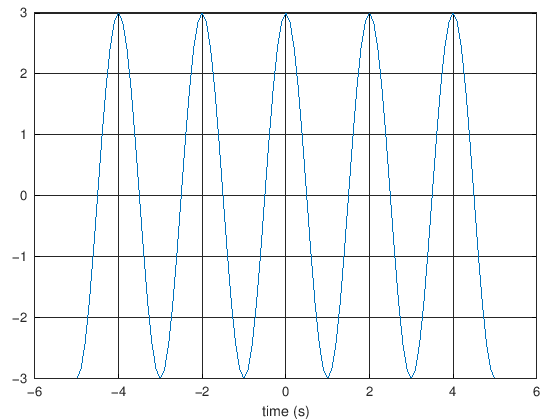

In [3]:
t=-5:0.1:5;
x=3*cos(2*pi*0.5*t);
plot(t,x,'linewidth',2)
grid on
xlabel('time (s)')

### Problem 1.1 : A script for the Cardinal sine signal

Write a **script** that calculates and displays the **cardinal sine** (sinc) defined by : $y\left(x \right)=\frac{sin(\pi x)}{\pi x} $ . Be careful when handling the tricky y value at x = 0, since a division by zero will lead to a warning and should be avoided. 

**Challenge**: _sinc_ can be implemented in 3 lines of code without explicit loop and without getting any "Warning" after running it. Will you succeed to approach this ? \(_Hint :_ you must find a way to avoid division by zero : Use the function _n =_ _find\(x\)_ to find the non\-zero elements of the vector x and type an instruction like  `y (n) = sin (pi * x(n)) / (pi*x(n))` to selectively assign a value to each element of the output vector y.

You will develop your script in the code cell below.



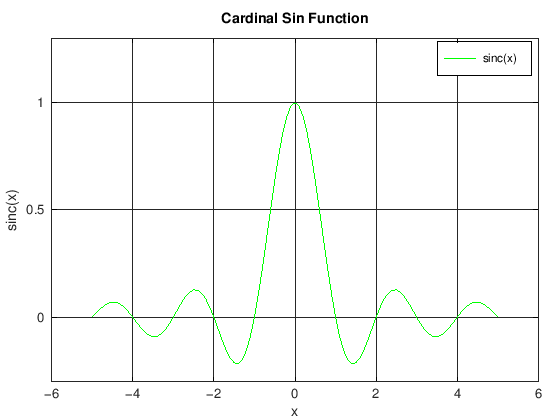

In [12]:
x = -5:0.1:5; # Defining the range from -0.5 to 0.5 with a step function of 0.1

y=ones(size(x)); # Defining the y as a vector of same size of x but with every value equal to 1 to account for the sin(0) = 1. 

n=find(x); # This returns all the non-zero components of x

y(n)=sin(pi * x(n)) ./ (pi * x(n)); # By this we define the cardinal sin function in terms of x(n) which are all non-zero x values

plot(x, y, 'g', 'LineWidth', 2); # Plotting the x and y in green color with a linewidth of 2

ylim([-0.3,1.3]); # Putting limits to y-axis to better visualize the plot

# Labeling axis, title and legend of plot
xlabel('x');
ylabel('sinc(x)');
title('Cardinal Sin Function');
legend('sinc(x)');
grid on;

### Problem 1.2 : A function for the Cardinal sine signal

Transform Script 1-1 into **a function *mysinc*** which should accommodate an amplitude A such that  $y\left(x \right)=A\frac{sin(\pi x)}{\pi x} $. For this, it is sufficient to format the script already produced just before. 

**Watch Out !** Your function will necessarily benefit from the vector character of Octave by accepting a **vector x** as input and returning a vector y. Comply the syntax of writing functions ; the first line, in particular, should be of the type: `y = mysinc(x, A)`. The call to the function in the command window should resemble the following statement: `x = mysinc (t, 4)`, where *t* is a variable defined in the workspace or in a calling script.

> **Warning** 1 : The **argument order** is particularly important if you intend to use this function for evaluating definite integrals using the (built-in) function *quadl*. To use your *mysinc* function as an argument of *quadl* , you must **first** **put** **the independent variable *t* before the parameter A** in the arguments of mysinc (*function* *y = mysinc(x, A)* works, but  *function* *y = mysinc(A, x)*) will not work.

> **Warning 2 :** In order for your function to be recognized by CoCalc, it should be present at the beginning of the current cell or in a previous cell which must be "executed" at least once before being called and used in subsequent cells. In the case you work outside Cocalc, you should save your function as *mysinc.m* either in your working directory or any convenient directory provided that it has been declared in the list of existing directories (Path) where Octave/Matlab scans the names of scripts and functions. **As a good habit, always follow this simple rule : the file name must always be the same as the name of the function given in the first line that defines the function.**

#### To do :

1. Use the newly created cardinal sine function to display the graph of $y \left(t \right)= sinc(t)= \frac{sin(\pi t)}{\pi t} $ signal between -10s and +10s in 0.1s steps. 
2. Verify that *mysinc* returns the right value at t=0 (provided that the value **t=0** is provided in vector **t**) ; if different from 1, remedy to the problem. 
3. Pick up the position of the zeros of this signal and justify mathematically. What is the value of the width of the central lobe of the signal ? 
4. Display the same signal with the indexes of the points as x-axis quantities instead of time.
5. Use the newly created cardinal sine function to superpose on the same graph of the $y^2 \left(t \right)=\left[ \frac{sin(\pi t)}{\pi t} \right]^2 $signal using the same interval and time steps. What is the main effect of the squaring on the amplitudes of the secondary lobes ?



In [58]:
# Task 0 = Defining Function

function y = mysinc (x, A)  # Defining function of mysinc with A
  y = ones(size(x));
  n=find(x);
  y(n)= A * sin(pi*x(n)) ./ (pi*x(n)); #Multiplying the previous function by A
end

The value of sinc at t=0 is 1


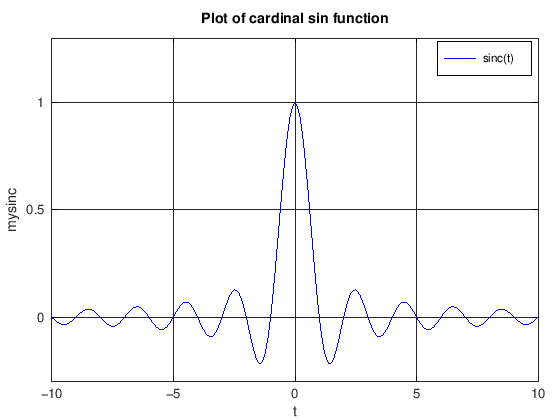

In [33]:
#Task 1 and Task 2

t = -10:0.1:10; #Defining the range
A = 1; # Defining amplitude which is 1 here

y = mysinc(t, A); # Calling function from the previous cell

plot(t, y,'b','Linewidth',2); # Plotting the function
ylim([-0.3,1.3]); # Putting limits for the better visualization

#Labeling axis, title, and legend
xlabel('t');
ylabel('mysinc');
title('Plot of cardinal sin function')
legend('sinc(t)')
grid on;

y_zero= y(t==0);

disp(['The value of sinc at t=0 is ',num2str(y_zero)]); # Showing the value of sinc function at x=0

<span style='color:#ff5722'>Task \# 03</span>

As we know that sinc function gives zero values at integer values except zero where it is one and as it is also evident from the plot. So, zeros of the function would be at following values;

$$t=\pm1, \pm2, \pm3, \pm4, \pm5, \pm6, \pm7, \pm8, \pm9, \pm10$$

To prove mathematically, as we know that 
$$sinc(n\pi)=sin(n\pi)/n\pi$$

And as we know that $sin$ of $\pi$ or integer multiple n of $\pi$ is always zero, thus $sinc(n\pi)$ would also be zero at all the above integer values.

###### **Central Lobe width:**

As we know that the central lobe happens to be between first two zeros of the function thus in this case those zeros happen at $\pm1$ thus the width of central lob would be 
$$width=1-(-1)=2$$



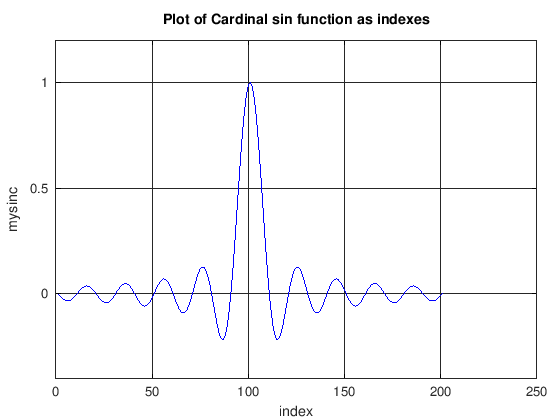

In [40]:
#Task 4

t=-10:0.1:10;
A=1;

y=mysinc(t,A);

indexes=1:length(t); % Defining indexes from 1 to total number of datasets

#Plotting
plot(indexes,y,'b','Linewidth',2);
ylim([-0.4,1.2]);
xlabel('index');
ylabel('mysinc');
title('Plot of Cardinal sin function as indexes');
grid on;

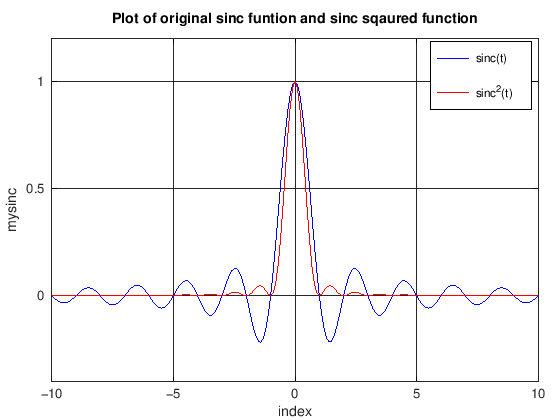

In [46]:
# Task 5

t=-10:0.1:10;
A=1;

y=mysinc(t,A); # Calling original function
y2=y.^2; # Squaring the original function

#Plotting
plot(t,y,'b','Linewidth',2); # Plotting original function 
hold on;
plot(t,y2,'r','Linewidth',2); # Plotting sqaured function function
ylim([-0.4,1.2]);
xlabel('index');
ylabel('mysinc');
title('Plot of original sinc funtion and sinc sqaured function');
legend('sinc(t)','sinc^2(t)');
grid on;
hold off;

**Effect of squaring on secondary lobs:**

The amplitude of secondary lobes has been significantly reduced while the central lob has become narrower.


### Problem 1.3 : Manipulations of signals

Many elements of signal analysis and manipulation can be represented by relatively simple mathematical operations performed on the function y(t) through the independent variable $t$. Dealing with the analytic expressions of transformed signals, it is generally useful to express the modifications in the normalized or standard form (see figure below). This way, the modifications can be visualized almost immediately.

![Normalized expression for transformed signals](https://amubox.univ-amu.fr/s/7YJ4yMnE4PkJC9f/preview) 

Using signal visualization tools like Octave or Matlab, it should become easy for you to visualize signals and their manipulations from simple command line instructions. Once a signal or a technique has been defined, it is equally easy to try variations, which can shed useful light on the behavior of signals and systems. 

#### To do :

When necessary, simplify the following signal analytic expressions in the normalized form, and **try to foresee the expected transformations** *w.r.t.* the reference cardinal sine signal. In a second step, use the newly created cardinal sine function to display the graph of the following signals on an adequate time window. 

1. $y_1 \left(t \right)= 5\frac{sin(\pi t)}{\pi t} $

2. $y_2 \left(t \right)= -2\frac{sin(\pi t)}{\pi t}$

3. $y_3 \left(t \right)= 7\frac{sin(\pi (t-2))}{\pi (t-2)}$

4. $y_4 \left(t \right)= 5\frac{sin(\pi (t+2))}{\pi t} $

5. Are there any differences between the signals $y_3(t)$ and  $y_5 \left(t \right)= 7\frac{sin(\pi (t-2))}{\pi t} $ ? Why is it so ? \(**Hint :** Compare with $y_5' \left(t \right)= 7\frac{sin(\pi (t-1))}{\pi t} $ \)

6. $y_6 \left(t \right)= 3sinc\left(2t \right)$

7. $y_7 \left(t \right)= -2sinc\left( \frac{t}{2} \right)$

8. Superpose on the same graph \(use `hold on`\) the signals $y_8 \left(t \right)= rect(t)$ and $y_{10} \left(t \right)= 5 rect(\frac{t+1}{6})$. \(**Hint :** The function `rectpuls(t)` is available on the additional package signal, to be loaded into GNU\-Octave by the instruction `pkg load signal` in the command window. You can also create your own unit rectangular function using _e.g._ a boolean condition of the type `double(abs(t)<0.5)`\).

9. $y_{11} \left(t \right)= 3sinc\left( \frac{t-2}{0.5} \right) rect(\frac{t}{8}-\frac{1}{4})$



<span style='color:#ff5722'>1\)</span>

$$y_1 \left(t \right)= 5\frac{sin(\pi t)}{\pi t}$$

- Amplitude A = 5, amplification by 5
- No translation
- No Scaling

$$Normalized\ form=y_1 \left(t \right)= 5 * sinc(t)$$

<span style='color:#ff5722'>2\)</span>

- Amplitude A = \-5, attenuation by 5
- No translation
- No Scaling

$$Normalized\ form=y_2 \left(t \right)= -5 * sinc(t)$$

<span style='color:#ff5722'>3\)</span>

$$y_3 \left(t \right)= 7\frac{sin(\pi (t-2))}{\pi (t-2)}$$

- Amplitude A = 7, amplification by 7
- Translation by \+2
- No Scaling

$$Normalized\ form=y_3 \left(t \right)= 7 * sinc(t-2)$$

<span style='color:#ff5722'>4\)</span>

$$y_4 \left(t \right)= 5\frac{sin(\pi (t+2))}{\pi t}$$

- This is not the usual cardinal sin function because although there is a translation by \-3 in the numerator but there is not translation by \-3 in the denominator. Because of it, it would have a different behavior than the usually used cardinal sin function.

<span style='color:#ff5722'>5\)</span>

Yes there is a clear difference between $y_3(t)$ and $y_5(t)$ as $y_3(t)$ is a cardinal sin function shifted by \+2, while $y_5(t)$ is also a shifted function by \+2 in the numerator but not in the denominator so it is not a cardinal sin function. However, it can be compared with $y_7(t)$ which is just a similar function by shifted by \+1 in the numerator

<span style='color:#ff5722'>6\)</span>

$$y_6 \left(t \right)= 3sinc\left(2t \right)$$

- Amplitude A = 3, amplification by 3
- No Translation
- Scaling by d=1/2 , shrinking

It is already in normalized form.

<span style='color:#ff5722'>7\)</span>

$$y_7 \left(t \right)= -2sinc\left( \frac{t}{2} \right)$$

- Amplitude A = -2, attenuation by 2
- No Translation
- Scaling by d=2 , expansion by 2

It is already in normalized form.

<span style='color:#ff5722'>8\)</span>

$$y_8 \left(t \right)= rect(t)$$

- Amplitude A = 1
- No Translation
- No scaling

$$y_{10} \left(t \right)= 5 rect(\frac{t+1}{6})$$

- Amplitude A = 5, amplification by 5
- Translation by -1
- Scaling by d=6 , expansion by 6

It is already in normalized form.

<span style='color:#ff5722'>9\)</span>

$$y_{11} \left(t \right)= 3sinc\left( \frac{t-2}{0.5} \right) rect(\frac{t}{8}-\frac{1}{4})$$

- Amplitude A = 3, amplification by 3
- Translation by +2
- Scaling by d=0.5 , shrinking
- The rec function selects only a certain region of sin function, i.e windowing the sinc function.

It is already in normalized form.

Now let's analyze their plots.



In [52]:
function y = rect(t,A)
    y = A * double(abs(t) < 0.5);
end

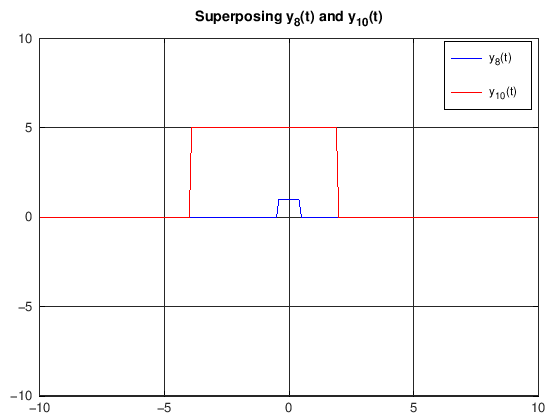

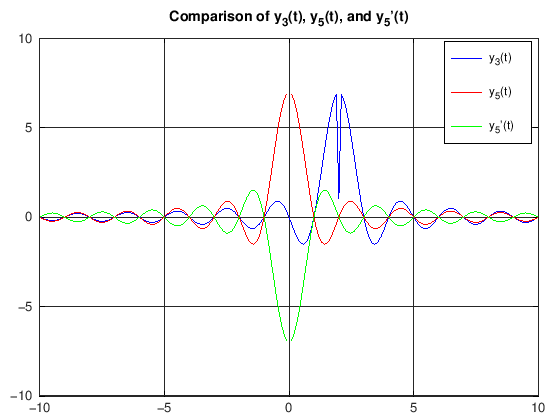

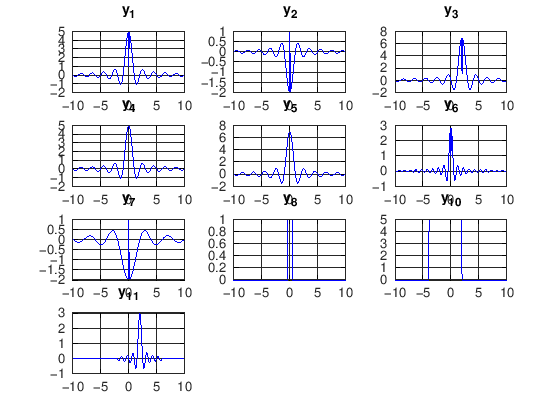

In [57]:
% Define the time domain
t = -10:0.1:10;

% Define the signals
y_1 = mysinc(t, 5); % y1(t) = 5 * sinc(t)
y_2 = mysinc(t, -2); % y2(t) = -2 * sinc(t)
y_3 = mysinc(t - 2, 7); % y3(t) = 7 * sinc(t - 2)
y_4 = 5 * sin(pi * (t + 2)) ./ (pi * t); % y4(t) = 5 * sinc(t + 2) / t
y_5 = 7 * sin(pi * (t - 2)) ./ (pi * t); % y5(t) = 7 * sinc(t - 2) / t
y_5_prime = 7 * sin(pi * (t - 1)) ./ (pi * t); % y5'(t) = 7 * sinc(t - 1) / t
y_6 = mysinc(2 * t, 3); % y6(t) = 3 * sinc(2t)
y_7 = mysinc(t / 2, -2); % y7(t) = -2 * sinc(t / 2)
y_8 = rect(t, 1); % y8(t) = rect(t)
y_10 = rect((t + 1) / 6, 5); % y10(t) = 5 * rect((t + 1) / 6)
y_11 = 3 * mysinc((t - 2) / 0.5, 1) .* rect((t / 8 - 1 / 4), 1); % y11(t) = 3 * sinc((t - 2) / 0.5) * rect(t / 8 - 1 / 4)

% Plot individual functions
figure;
subplot(4, 3, 1); plot(t, y_1, 'b', 'LineWidth', 2); title('y_1'); grid on;
subplot(4, 3, 2); plot(t, y_2, 'b', 'LineWidth', 2); title('y_2'); grid on;
subplot(4, 3, 3); plot(t, y_3, 'b', 'LineWidth', 2); title('y_3'); grid on;
subplot(4, 3, 4); plot(t, y_4, 'b', 'LineWidth', 2); title('y_4'); grid on;
subplot(4, 3, 5); plot(t, y_5, 'b', 'LineWidth', 2); title('y_5'); grid on;
subplot(4, 3, 6); plot(t, y_6, 'b', 'LineWidth', 2); title('y_6'); grid on;
subplot(4, 3, 7); plot(t, y_7, 'b', 'LineWidth', 2); title('y_7'); grid on;
subplot(4, 3, 8); plot(t, y_8, 'b', 'LineWidth', 2); title('y_8'); grid on;
subplot(4, 3, 9); plot(t, y_10, 'b', 'LineWidth', 2); title('y_{10}'); grid on;
subplot(4, 3, 10); plot(t, y_11, 'b', 'LineWidth', 2); title('y_{11}'); grid on;

% Plot y_3(t), y_5(t), and y_5_prime(t)
figure;
plot(t, y_3, 'b', 'LineWidth', 2); hold on;
plot(t, y_5, 'r', 'LineWidth', 2); hold on;
plot(t, y_5_prime, 'g', 'LineWidth', 2);
title('Comparison of y_3(t), y_5(t), and y_5''(t)');
legend('y_3(t)', 'y_5(t)', 'y_5''(t)');
grid on;

% Superpose y_8(t) and y_10(t)
figure;
plot(t, y_8, 'b', 'LineWidth', 2); hold on;
plot(t, y_10, 'r', 'LineWidth', 2);
title('Superposing y_8(t) and y_{10}(t)');
ylim([-10,10]);
legend('y_8(t)', 'y_{10}(t)');
grid on;

10. Give the analytical expression for the following signals $w_1(t)$ (only a part of the signal is shown), $w_2(t)$ and $w_3(t)$, the latter two being finite-**domain** (see the definition below) signals. 

![the following signals](https://amubox.univ-amu.fr/s/wyBndBBAyYyPsem/preview)



<span style='color:#ff5722'>1\) </span>

As the function has a central peak between 0 and \-5, while function is getting to zero at certain values and successively decreasing in amplitude also. So this is a part of a cardinal sin function that is translated by approximately \-2.  It has an amplitude of A= 3. While the central lobe width denoted by B is to be find by finding the zeros of function.

so, we can write 

$$w_1(t)=3 * sinc(B(t+2))$$

<span style='color:#ff5722'>2\) </span>

It's also a cardinal sin function with central peak at 3, that means it is translated by \+3.  It has an amplitude of A= 3. While the central lobe width denoted by B is to be find by finding the zeros of function.

so, we can write 


$$
w_2(t)=3 * sinc(B(t-2))
$$

<span style='color:#ff5722'>3\) </span>

It's also a cardinal sin function with central peak at 1, that means it is translated by \+1.  It has an amplitude of A= 4. While the central lobe width denoted by B is to be find by finding the zeros of function.

so, we can write 


$$
w_3(t)=4 * sinc(B(t-1))
$$



<span style="color:blue">Indicate your answer here in this cell by editing this markdown cell :</span>
You can use the usual [Markdown highlighting](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images) as well as [$\LaTeX$ -type mathematical formulas.](https://en.wikibooks.org/wiki/LaTeX/Mathematics#Controlling_horizontal_spacing)

### Problem 1.4 : Energy of the cardinal sine

**a.** Use your function as an input to `quadl` to evaluate the definite integral of $4sinc(t)$ between -1 and 1 and between -10 and 10. Indicate the obtained values in your report.

**Hint :** Passing parameters such as amplitude A is possible in *quadl*, the parameters being placed (in order of their definition) after two mandatory parameters useful for calculating the integral, which may however be left empty when calling *quadl*.

Example : `q=quadl('mysinc',-10,10,[],[],A)`, where [] denotes the empty matrix (have a look at `help quadl`).

**b.** In a single figure, superpose $y(t)=sinc(t)$ and $y^2(t)=sinc^2(t)$  between -10 and 10. Use a new function to compute $y^2(t)=sinc^2(t)$ and use it to assess what fraction of the total energy of the signal (defined as the integral of the square of the signal) is concentrated in the central lobe of the cardinal sine.

**c.** In a new figure, show the dependence of the (partial) signal energy versus a when integrating on the interval [-a;a]. Your graph should show the convergence towards the total signal energy.

In [63]:
# Task a

A=4; # Defining the amplitude

q1=quadl(@(t) mysinc(t,A),-1,1); # Integral over -1,1 using quadl
q2=quadl(@(t) mysinc(t,A),-10,10); # Integral over -10,10 using quadl

# Printing results

fprintf('The integral of 4sinc(t) from -1 to 1 is %f\n', q1); 
fprintf('The integral of 4sinc(t) from -10 to 10 is %f\n', q1);

The integral of 4sinc(t) from -1 to 1 is 4.715919


The integral of 4sinc(t) from -10 to 10 is 4.715919


In [64]:
function y2 = mysinc2(t, A)  # Defining sinc_sqaured function
         y = mysinc(t,A);
         y2 = y.^ 2;
end

The fraction of energy concentrated at central lobe to the total energy: 91.206%


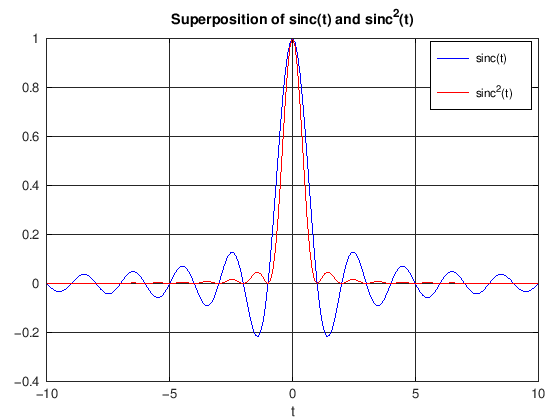

In [70]:
# Task b)

t=-10:0.1:10; 
A=1;

y = mysinc(t,A); # Calling original sinc function
y2 = mysinc2(t,A); # Calling sinc  sqaured function

figure
plot(t, y, 'b', 'LineWidth',2); # Plotting original sinc function
hold on
plot(t, y2, 'r', 'LineWidth', 2); # Plotting sinc sqaured function
xlabel('t');
title('Superposition of sinc(t) and sinc^2(t)');
legend('sinc(t)', 'sinc^2(t)');
grid on;
hold off;


# Energy calculations

q_total = quadl(@(t) mysinc2(t,A),-10,10); #Finding the total energy by integrating sinc^2(t) over -10,10
q_central_lobe = quadl(@(t) mysinc2(t,A),-1,1); #Finding the energy concentrated in central lobe by integrating sinc^2(t) over -1,1 which infact makes the central lobe as these are the first zeros of function

q_fraction = q_central_lobe / q_total * 100; # Finding the fraction of energy concentrated at central lobe to the total energy over -10,10

# Printing fraction
fprintf('The fraction of energy concentrated at central lobe to the total energy: %.3f%%\n', q_fraction); 

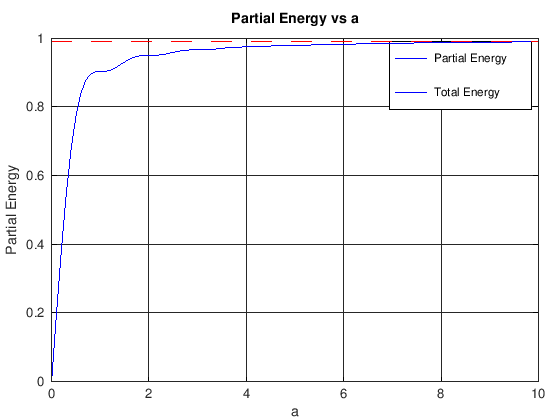

In [84]:
# Task C

# As total energy is the one that is gained by integrating sinc sqaured over -10, 10
# Partial energy would be the one gained by integrating over lesser domain -a,a given that abs(a) should be smaller than 10

# Lets take certain values of a 
a_total=-0:0.1:10;
q_partial=zeros(length(a_total));  # definfing the partial eenrgy vector of the same length of a
A=1;

q_total = quadl(@(t) mysinc2(t,A), -10, 10); # Finding total energy

# Fidning partial energy over -a,a for every a
for i=1:length(a_total)
    a = a_total(i);
    q_partial(i) = quadl(@(t) mysinc2(t,A), -a, a); 
end

# Plotting both partial energy and total energy vs a
figure
plot(a_total, q_partial, 'b', 'LineWidth',2);
hold on
plot([min(a_total), max(a_total)], [q_total, q_total], 'r--', 'LineWidth', 2);
xlabel('a');
ylabel('Partial Energy');
title('Partial Energy vs a')
legend('Partial Energy', 'Total Energy');
grid on; 
hold off;

### Problem 1.5 : The normalized triangular signal

**a.** Write an Octave function `tri(fs)` to generate the normalized \(area\) triangular signal on the interval $[-2;2]$. **Caution** : Chose the right function parameters to allow a  subsequent evaluation of the energy using `quadl`. 

**b.** Use your function to produce a graph which mimics the signal $x(t)=3 \ tri \left({0.5t-2.5} \right)$. Transform the analytical expression of $x(t)$ using the normalized form $x(t)=A \ tri \left(\frac{t-d}{c} \right)$ and identify graphically the parameters A, c and d.  

**c.** Compute an estimated value of the energy of $tri(t)$, and verify your result by resolving the relevant integral.  



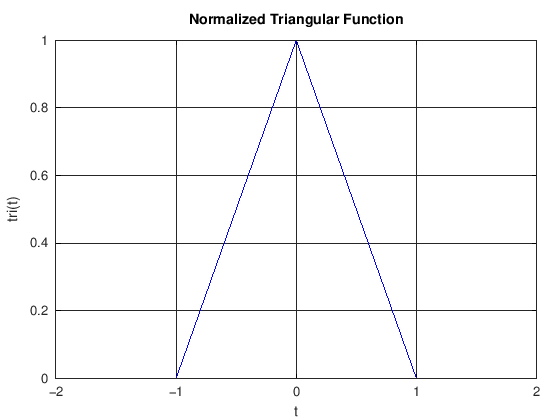

In [88]:
# Task a

# Defining the trainagular function
function y = tri(fs)
    y = max(1 - abs(fs), 0); %This returns the max value, if abs(fs) is <= 1, it would return value, otherwise it returns zero
end

# Example as such the question requirement
% Defining the time vector
fs = -2:0.1:2;
y = tri(fs);

% Plotting the function
plot(fs, y, 'b', 'LineWidth', 2);
xlabel('t');
ylabel('tri(t)');
title('Normalized Triangular Function');
grid on;

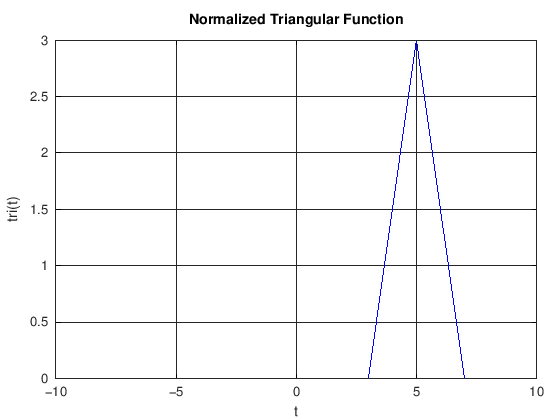

In [89]:
# Task b

% Defining the time vector with sufficent values
fs = -10:0.1:10;
y = 3 * tri((0.5 * fs) - 2.5);

% Plotting the function
plot(fs, y, 'b', 'LineWidth', 2);
xlabel('t');
ylabel('tri(t)');
title('Normalized Triangular Function');
grid on;

As we have 

$x(t)=3 \ tri \left({0.5t-2.5} \right)$

$x(t)=3 \ tri \left({\frac{t}{2}-2.5} \right)$

$x(t)=3 \ tri \left({\frac{t-5}{2}} \right) =A \ tri \left(\frac{t-d}{c} \right)$

So,   $A = 3, d = 5,  c =2$ , which are clearly evident from the graph also


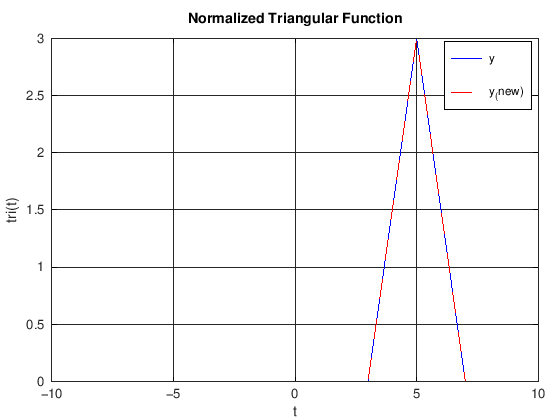

In [96]:
# Now plotting the new function and superimposing on the previous one to have a better visualization 

% Defining the time vector with sufficent values
fs = -10:0.1:10;
A = 3;
d = 5;
c = 2;
y = 3 * tri(0.5 * fs - 2.5);
y_new = A * tri((t - d) / c);

% Plotting the function
plot(fs, y, 'b', 'LineWidth', 2);
hold on
plot(fs, y_new, 'r--', 'LineWidth', 2);
xlabel('t');
ylabel('tri(t)');
title('Normalized Triangular Function');
legend('y', 'y_(new)');
grid on;

<span style='color:#ff5722'>Task 3\)</span>

We can compute energy as follows:

$$E = \int_{-\infty}^{\infty} \text{tri}^2(t) \, dt$$

$$E = \int_{4}^{6} \text{tri}^2(t) \, dt$$

$$E = \int_{4}^{5} \text{tri}^2(t) \, dt +  \int_{5}^{6} \text{tri}^2(t) \, dt$$

Using the definition of the triangular function:

$$
\text{tri}(t) =
\begin{cases}
t - 4, & 4 \leq t \leq 5 \\
6 - t, & 5 \leq t \leq 6 \\
0, & \text{otherwise}
\end{cases}
$$

$$E = \int_{4}^{5} (t - 4)^2 \, dt + \int_{5}^{6} (6 - t)^2 \, dt$$

$$\int (t - 4)^2 dt = \frac{(t - 4)^3}{3}$$

$$\left[ \frac{(t - 4)^3}{3} \right]_{4}^{5} = \frac{(5 - 4)^3}{3} - \frac{(4 - 4)^3}{3} = \frac{1}{3}$$

$$\int (6 - t)^2 dt = \frac{(6 - t)^3}{3} \cdot (-1)$$

$$\left[ -\frac{(6 - t)^3}{3} \right]_{5}^{6} = -\left( \frac{(6 - 6)^3}{3} - \frac{(6 - 5)^3}{3} \right) = \frac{1}{3}$$

Thus, the total energy by computation:

$$E = \frac{1}{3} + \frac{1}{3} = \frac{2}{3}$$

Now let's find by programming



In [100]:
q_tri = quadl(@(t) tri(t).^2, -10, 10); # Finding the value of energy numerically


fprintf('Numerically calculated energy of tri(t): %.3f\n', q_tri); # Printing Numerical result
fprintf('Theoretical Energy of tri(t): %.3f\n', 2/3); # Printing calculated result

Numerically calculated energy of tri(t): 0.667


Theoretical Energy of tri(t): 0.667


## Conclusions

Complete this cell with your personal conclusions about what you've learned. Give an estimation on the time you've spent (outside the alloted time for lab sessions) realizing this lab session. 

I spend almost 8 hours of continuous work to understand and solve this exercise to my best. It helped me learn and strongly practice fundamentals in signal processing. Concluding, I revisit basic coding in Matlab on how to define a function, call a function, plotting, loops and using interesting functions like "find", "quadl" functions. Furthermore, I learned and practiced rigorously on significant functions such as cardinal sin function, rectangular function and triangular function. I learned how different changes in the function affect the overall distribution of function such that translation, scaling, amplification or attenuation. I learn to recognize signals based on their distribution profile. I learn how to find energy values of any function using quadl. Lastly, It help me learn how to compare, analyze and modulate signals. 
